# Introduction

#### Scenario
I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago (Fictional company). 
The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. 

#### About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

#### Moreno (Marketing manager) has set a clear goal: 
Design marketing strategies aimed at converting casual riders into annual members. 

In order to do that we in the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends

# My process In Analysis

In order to answer the key business questions, I will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act 

## ASK

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

### Business Task
- Identifying the main differences between casual and annual riders and using digital media to influence them

## Prepare

- Data is located in 12 CSV files collected by the company organized into 13 columns
- there is no biased or credibility in this data because this is first-party data
- This data is ROCC (Reliable, original, comprehensive, current, and cited)
- Before using python, I make some calculations in spreadsheets ( the ride length and the day of the week)
- I used python to merge all 12 data files into one file

In [43]:
# importing a libray ( I merged all the data files in one file in seprate note books)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
all_trips = pd.read_csv("cyclistic_fullyear_data.csv")

In [3]:
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,1/13/2022 11:59,1/13/2022 12:02,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0:02:57,5
1,A6CF8980A652D272,electric_bike,1/10/2022 8:41,1/10/2022 8:46,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0:04:21,2
2,BD0F91DFF741C66D,classic_bike,1/25/2022 4:53,1/25/2022 4:58,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0:04:21,3
3,CBB80ED419105406,classic_bike,1/4/2022 0:18,1/4/2022 0:33,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0:14:56,3
4,DDC963BFDDA51EEA,classic_bike,1/20/2022 1:31,1/20/2022 1:37,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0:06:02,5


## Process

#### Documentation of any cleaning or manipulation of data
- Dropping Nulls value
- transforming the data type of end date and start date to date type
- I dropped the ride_length and make a new one in minutes in integer type
- I dropped the start station name id and the end station name Id
- Removing negative and zero values of ride length
- Create a monthly column by extracting it from the start date
- I checked the duplicated rows
- Make sure the column is consistent
- Saving cleaned data into a new CSV file ( to use it for visualization)

### Data Cleaning


In [4]:
# Getting information about data to check if there are errors
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  day_of_week         int64  
dtypes: float64(4), int64(1), object(10)
memory usage: 648.6+ MB


- Must convert the started_at and ended_at into the corect data type (date-time)
- I must add the month column to the dataset
- converting ride_length into int type

In [5]:
# checking Null Values
all_trips.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
ride_length                0
day_of_week                0
dtype: int64

- I will drob the columns ( start_station_id,end_station_id) 
- I get the name of stations from langtude and latitude data to complete the missing value ( I will make new columns and I will drop the old columns)
- Removing the rows has null values

In [5]:
# Checking duplication value
all_trips.duplicated().sum()

0

- there are no duplicated value

##### 1. Dropping All Rows with Missing Values

In [3]:
# Dropping All Rows with Missing Values
all_trips.dropna(inplace =True)

In [4]:
# checking Null Values after cleaning
all_trips.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64

- the missing values sucessfuly deleted

##### 2. Converting the data into corect data type

In [13]:
# converting ride_length into int or datetime
#pd.to_timedelta(all_trips['ride_length'])
all_trips['ride_length'] = pd.to_numeric(all_trips['ride_length'])#, format='%M:%S', errors='coerce', utc = True)

In [10]:
# Convert the statrted_at, and ended at column to date_type,then Extracting month from data (I want the name of the month)
all_trips['month'] = pd.to_datetime(all_trips['started_at']).dt.month_name()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month
0,C2F7DD78E82EC875,electric_bike,1/13/2022 11:59,1/13/2022 12:02,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,NaT,5,January
1,A6CF8980A652D272,electric_bike,1/10/2022 8:41,1/10/2022 8:46,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,NaT,2,January
2,BD0F91DFF741C66D,classic_bike,1/25/2022 4:53,1/25/2022 4:58,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,NaT,3,January
3,CBB80ED419105406,classic_bike,1/4/2022 0:18,1/4/2022 0:33,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,NaT,3,January
4,DDC963BFDDA51EEA,classic_bike,1/20/2022 1:31,1/20/2022 1:37,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,NaT,5,January


In [14]:
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month
0,C2F7DD78E82EC875,electric_bike,1/13/2022 11:59,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,-9223372036854775808,5,January
1,A6CF8980A652D272,electric_bike,1/10/2022 8:41,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,-9223372036854775808,2,January
2,BD0F91DFF741C66D,classic_bike,1/25/2022 4:53,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,-9223372036854775808,3,January
3,CBB80ED419105406,classic_bike,1/4/2022 0:18,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,-9223372036854775808,3,January
4,DDC963BFDDA51EEA,classic_bike,1/20/2022 1:31,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,-9223372036854775808,5,January


In [20]:
# Convert eneded_at column to date time
all_trips['ended_at'] = pd.to_datetime(all_trips['ended_at'])

In [22]:
# Convert eneded_at column to date time
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])

In [15]:
all_trips['ride_length'] = pd.to_datetime(all_trips['ride_length']).dt.strftime('%M:%S')


In [23]:
# make sure the data is converted 
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369360 entries, 0 to 5667716
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
 14  day_of_week         int64         
 15  month               object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usage: 566.7+ MB


In [17]:
# show the data
all_trips

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month
0,C2F7DD78E82EC875,electric_bike,1/13/2022 11:59,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,NaN,5,January
1,A6CF8980A652D272,electric_bike,1/10/2022 8:41,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,NaN,2,January
2,BD0F91DFF741C66D,classic_bike,1/25/2022 4:53,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,NaN,3,January
3,CBB80ED419105406,classic_bike,1/4/2022 0:18,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,NaN,3,January
4,DDC963BFDDA51EEA,classic_bike,1/20/2022 1:31,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,NaN,5,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667712,43ABEE85B6E15DCA,classic_bike,12/5/2022 6:51,2022-12-05 06:54:00,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,NaN,2,December
5667713,F041C89A3D1F0270,electric_bike,12/14/2022 17:06,2022-12-14 17:19:00,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,NaN,4,December
5667714,A2BECB88430BE156,classic_bike,12/8/2022 16:27,2022-12-08 16:32:00,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,NaN,5,December
5667715,37B392960E566F58,classic_bike,12/28/2022 9:37,2022-12-28 09:41:00,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,NaN,4,December


In [18]:
# importing library for date time
import datetime as datetime
from datetime import timedelta

In [25]:
# make anew column of ride length
all_trips['ride_length1'] = (all_trips['ended_at'] - all_trips['started_at'])
all_trips['ride_length1'] = (all_trips['ride_length1'])/timedelta(minutes=1)
all_trips['ride_length1'] = all_trips['ride_length1'].round(decimals = 1)
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month,ride_length1
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,NaN,5,January,3.0
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,NaN,2,January,5.0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,NaN,3,January,5.0
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,NaN,3,January,15.0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,NaN,5,January,6.0


##### 3. make sure the data in column correct and consistent

In [8]:
# Make sure the member_casual column are consistent
all_trips['member_casual'].value_counts()

member    3345685
casual    2322032
Name: member_casual, dtype: int64

- this column are consistent because it is contain the two variables we are need


In [9]:
# Make sure the rideable_type column are consistent
all_trips['rideable_type'].value_counts() 

electric_bike    2889029
classic_bike     2601214
docked_bike       177474
Name: rideable_type, dtype: int64

In [26]:
all_trips['start_station_name'].value_counts() 

Streeter Dr & Grand Ave                     71269
DuSable Lake Shore Dr & Monroe St           39251
DuSable Lake Shore Dr & North Blvd          37698
Michigan Ave & Oak St                       37208
Wells St & Concord Ln                       34508
                                            ...  
Michigan Ave & 113th St                         1
Public Rack - Garfield Park Conservatory        1
Public Rack - Damen Ave & 47th St               1
Plainfield Ave & Irving Park Rd                 1
Halsted St & 95th St - SE                       1
Name: start_station_name, Length: 1556, dtype: int64

In [27]:
all_trips['end_station_name'].value_counts() 

Streeter Dr & Grand Ave                        72540
DuSable Lake Shore Dr & North Blvd             40563
DuSable Lake Shore Dr & Monroe St              38500
Michigan Ave & Oak St                          38279
Wells St & Concord Ln                          34688
                                               ...  
Public Rack - Emerald Ave & 43rd St                1
Public Rack - Chappel Ave & 71st St                1
Public Rack - Independence Blvd & Roosevelt        1
Public Rack - Kildare Ave & Washignton Blvd        1
Public Rack - Loomis Blvd & 47th St                1
Name: end_station_name, Length: 1598, dtype: int64

##### 4. Removing un needed columns

In [28]:
# Removing start_station_id, end s_station_id, sart_at and end_at columns (I do not need it in my analysis)
# removing the old column of ride_length
all_trips = all_trips.drop(['start_station_id', 'end_station_id','ride_length'], axis=1)

In [29]:
# view the data
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_length1
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,5,January,3.0
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,2,January,5.0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,3,January,5.0
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,3,January,15.0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,5,January,6.0


##### 5. checking of outlier

In [31]:
# check the outlier
all_trips[all_trips['ride_length1'] <= 0].count()

ride_id               44594
rideable_type         44594
started_at            44594
ended_at              44594
start_station_name    44594
end_station_name      44594
start_lat             44594
start_lng             44594
end_lat               44594
end_lng               44594
member_casual         44594
day_of_week           44594
month                 44594
ride_length1          44594
dtype: int64

In [33]:
# removing rows with zero or negative values
all_trips = all_trips.drop(all_trips[all_trips.ride_length1 <= 0].index)

In [39]:
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324766 entries, 0 to 5667716
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       object        
 11  day_of_week         int64         
 12  month               object        
 13  ride_length1        float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 494.9+ MB


In [36]:
# Converting a cleaning data to a csv file 
all_trips.to_csv("cyclistic_data_cleaned.csv",index=False)

In [37]:
trips_clean=pd.read_csv('cyclistic_data_cleaned.csv')
trips_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_length1
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,5,January,3.0
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,2,January,5.0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,3,January,5.0
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,3,January,15.0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,5,January,6.0


## Analyze and Visualize 

### 1. What is number of  each member and casual riders ?

In [73]:
# the count of each riders
all_trips['member_casual'].value_counts()

member    2581882
casual    1742884
Name: member_casual, dtype: int64

In [83]:
# the precentage of member riders
member_precent=(2581882/(2581882+1742884))*100
member_precent

59.699923649048294

- The annual subscribers is more than th casual riders is about 60% and the casual riders(unsubscribers) is 40% 

### 2.The difference between rider_length of member and casual rider

In [40]:
# The average ride length
avg_ride_length = all_trips.groupby('member_casual', as_index=True)[['ride_length1']].mean()
avg_ride_length

,ride_length1
member_casual,
casual,24.203740
member,12.592979


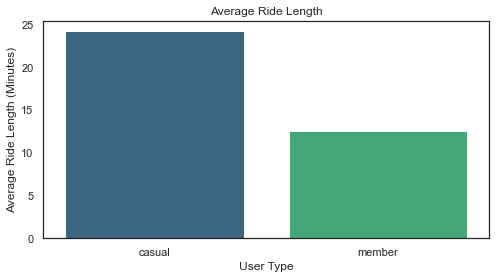

In [45]:
# the average ride_length visualization
df1 = trips_clean[['ride_length1', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length1']].mean()

plt.figure(figsize = (8,4))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length1', palette='viridis').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

- The average ride legnth of casuals is more than the member by twice

#### 3.What is the most days  riders use the bike

In [72]:
# the most day of member rider (we use the mode)
mostday_pivot = pd.pivot_table(all_trips, index=['day_of_week', 'member_casual',], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
mostday_pivot

count
                           ride_id
day_of_week member_casual         
1           casual          298629
            member          294138
2           casual          208969
            member          371067
3           casual          194644
            member          406904
4           casual          201844
            member          408268
5           casual          228092
            member          411389
6           casual          246649
            member          355976
7           casual          364057
            member          334140
total count                4324766

- Note that 1 stand for sunday and so on

In [75]:
# the most day all riders used bikes
mode_week_day = all_trips['day_of_week'].mode()
mode_week_day

0    7
dtype: int64

- the most day all riders use bikes is saturday

In [77]:
# calculte the mode of week-day of members
mode_week_day_member = all_trips[all_trips['member_casual'] == 'member']
mode_week_day_member = mode_week_day_member['day_of_week'].mode()
mode_week_day_member

0    5
dtype: int64

- the most day the member use bikes is thursday

In [81]:
# calculte the mode of week-day of casual
mode_week_day_casual = all_trips[all_trips['member_casual'] == 'casual']
mode_week_day_casual = mode_week_day_casual['day_of_week'].mode()
mode_week_day_casual

0    7
dtype: int64

- the most day the casual riders use bike in suterday (in the week end)

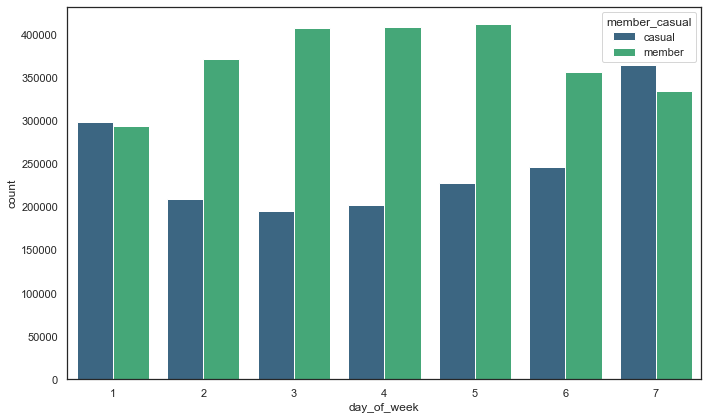

In [51]:
# visualization of days according to ride length
plt.figure(figsize=(10,6))
order = [1,2,3,4,5,6,7]
sns.countplot(x='day_of_week', hue='member_casual', data=all_trips, palette='viridis', order=order)
plt.tight_layout()

#### 4.What is the most popular type of bikes the two riders use in their jurney

In [57]:
# the most type of bike riders use 
ridetype_pivot = pd.pivot_table(all_trips, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
ridetype_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          881545
              member         1692709
docked_bike   casual          173954
electric_bike casual          687385
              member          889173
total count                  4324766

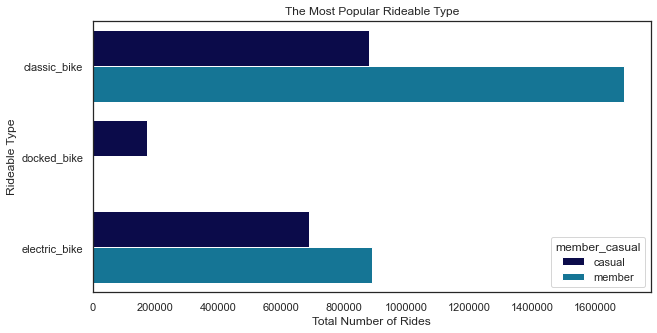

In [61]:
# the most type of bike riders use visualization
df2 = all_trips[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='ocean', data=df2).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

- That is mean the casual riders uses the docked type where the member does not
- the most type used by the casual and memeber is the classic bike then the electric bike

#### 5.What is the most monthes has a high use of bikes

In [59]:
#  the most month the riders uses bike
mostmonth_pivot = pd.pivot_table(all_trips, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
mostmonth_pivot

count
                           ride_id
month       member_casual         
April       casual           91304
            member          178927
August      casual          267648
            member          331382
December    casual           31212
            member          102517
February    casual           15034
            member           73245
January     casual           12521
            member           66993
July        casual          308824
            member          327071
June        casual          289522
            member          324629
March       casual           66735
            member          147447
May         casual          218326
            member          279204
November    casual           72857
            member          180108
October     casual          149915
            member          259720
September   casual          218986
            member          310639
total count                4324766

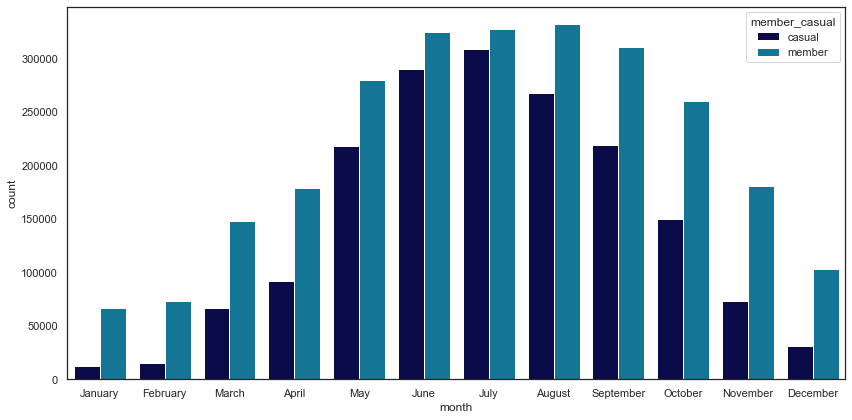

In [56]:
# visualization of the most month the riders uses bike
plt.figure(figsize=(12,6))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
sns.countplot(x='month', hue='member_casual', data=all_trips, palette='ocean', order=order)
plt.tight_layout()

- The activity of annual subscribers bike users high from May to October (the most active month is August)
- The activity of casual bike users high from May to Septemper ( most active month is July)
- That is clearly the users active in summer

## INSIGHTS 
- The annual subscribers are more than the casual riders by about 60%, and the casual riders(unsubscribers) are 40% 
- The average ride length of casuals is more than the member by twice
- The most day all riders use bikes is Saturday
- The day the member use bikes is Thursday
- The most day, casual riders use bikes on Saturday (on the weekend)
- The casual riders use the docked type where the member does not
- The type used by the casual and members is the classic bike then, the electric bike
- The activity of annual subscribers' bike users is high from May to October (the most active month is August)
- The activity of casual bike users is high from May to September (the most active month is July)
-  The users active in the summer

## Recomenditions
- I suggest making a summer subscription to attract the casual member
- Where the casual members' ride length is more than the annual subscriber, the casual riders use the bike on weekends and in summer. We can custom a new subscription for them
- Where the casual subscribers there used the docked type cycle. We can make an offer on this type when they use this type in an annual subscription